This notebook finds the average recovery period of Covid-19 disease in Kerala.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dta = pd.read_csv('chronoPositiv.csv')
dta.head(5)

,Date,District,PersonType,NumberOfPatients,PresentStatus,Remarks,DischargedDate
0,09/03/20,Thrissur,native,1,negative,discharged,17/03/20
1,09/03/20,Alappuzha,native,1,negative,discharged,17/03/20
2,09/03/20,Kasargod,native,1,negative,discharged,17/04/20
3,09/03/20,Pathanamthitta,native,5,negative,discharged,01/04/20
4,09/03/20,Ernakulam,native,1,negative,discharged,27/03/20


In [3]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 7 columns):
Date                584 non-null object
District            579 non-null object
PersonType          579 non-null object
NumberOfPatients    584 non-null int64
PresentStatus       579 non-null object
Remarks             579 non-null object
DischargedDate      406 non-null object
dtypes: int64(1), object(6)
memory usage: 32.0+ KB


In [4]:
# 'Date' column is in object format.Change that into datetime.
dta['Date'] = pd.to_datetime(dta['Date'], dayfirst=True) #


# 'DischargedDate' column is in object format.Change that into datetime.
dta['DischargedDate'] = pd.to_datetime(dta['DischargedDate'], dayfirst=True) #


# setting index to 'Date'
dta.set_index('Date',inplace=True)

#
print(dta.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 584 entries, 2020-03-09 to 2020-05-31
Data columns (total 6 columns):
District            579 non-null object
PersonType          579 non-null object
NumberOfPatients    584 non-null int64
PresentStatus       579 non-null object
Remarks             579 non-null object
DischargedDate      406 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 31.9+ KB
None


In [5]:
dta.head(5)

,District,PersonType,NumberOfPatients,PresentStatus,Remarks,DischargedDate
Date,,,,,,
2020-03-09,Thrissur,native,1,negative,discharged,2020-03-17
2020-03-09,Alappuzha,native,1,negative,discharged,2020-03-17
2020-03-09,Kasargod,native,1,negative,discharged,2020-04-17
2020-03-09,Pathanamthitta,native,5,negative,discharged,2020-04-01
2020-03-09,Ernakulam,native,1,negative,discharged,2020-03-27


In [6]:
# details of discharged patients taken separately.
dscharg = dta[(dta.Remarks =='discharged')]

In [7]:
# Create a null list for recovery period of patients.
recoveryTime =  []
    
for i in range(0,len(dscharg)):
    t = dscharg.DischargedDate[i] - dscharg.index[i]
    recoveryTime.append(t.days)   # Taking only 'days' portion of the timestamp.
    
    # Creating new column 'recoveryTime' in dscharg dataframe.
dscharg['recoveryTime'] = recoveryTime      
    
    # Finding average recovery period.
sop = 0
for i in range(0,len(dscharg)):
    sop = sop + (dscharg.NumberOfPatients[i] * dscharg.recoveryTime[i])
    

/home/sandeep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [8]:
# function to find average recovery time.


    # Create a null list for recovery period of patients.
recoveryTime =  []
    
for i in range(0,len(dscharg)):
    t = dscharg.DischargedDate[i] - dscharg.index[i]
    recoveryTime.append(t.days)   # Taking only 'days' portion of the timestamp.
    
    # Creating new column 'recoveryTime' in dscharg dataframe.
dscharg['recoveryTime'] = recoveryTime      
    
    # Finding average recovery period.
sop = 0
for i in range(0,len(dscharg)):
    sop = sop + (dscharg.NumberOfPatients[i] * dscharg.recoveryTime[i])
    
avg = sop/(dscharg.NumberOfPatients.sum())
print('Average recovery period = ', avg, 'days')


Average recovery period =  15.20034542314335 days


/home/sandeep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [9]:
dscharg

,District,PersonType,NumberOfPatients,PresentStatus,Remarks,DischargedDate,recoveryTime
Date,,,,,,,
2020-03-09,Thrissur,native,1,negative,discharged,2020-03-17,8
2020-03-09,Alappuzha,native,1,negative,discharged,2020-03-17,8
2020-03-09,Kasargod,native,1,negative,discharged,2020-04-17,39
2020-03-09,Pathanamthitta,native,5,negative,discharged,2020-04-01,23
2020-03-09,Ernakulam,native,1,negative,discharged,2020-03-27,18
2020-03-10,Kottayam,native,2,negative,discharged,2020-04-12,33
2020-03-10,Pathanamthitta,native,3,negative,discharged,2020-04-12,33
2020-03-10,Pathanamthitta,native,1,negative,discharged,2020-04-25,46
2020-03-10,Ernakulam,native,2,negative,discharged,2020-04-12,33


In [10]:
# Taking each patients recovery time to a separate list.
eachPatietsTime  =[]

for i in range(0,len(dscharg)):
    for j in range(0,dscharg.NumberOfPatients[i]):
        eachPatietsTime.append(dscharg.recoveryTime[i])
    

In [11]:
# Finding standard deviation.
print('Standard deviation =',np.std(eachPatietsTime))

# Finding mean of the distribution.
print('Mean =', np.mean(eachPatietsTime))      


Standard deviation = 7.395414712869644
Mean = 15.20034542314335


Basic statistical analysis.

In [12]:
# 1) Test for normality .

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Normal Distribution (recovery time of patients)')]

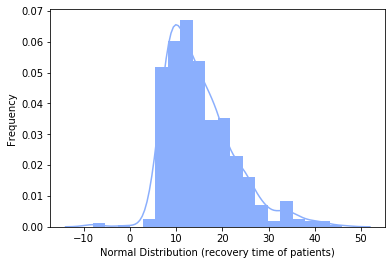

In [13]:
ax = sns.distplot(eachPatietsTime,bins=20,kde=True,color='#8baffd',
                  hist_kws={"linewidth": 12,'alpha':1})
ax.set(xlabel='Normal Distribution (recovery time of patients)', ylabel='Frequency')

In [14]:
# The distribution plot is almost has a Gaussian curve except a slight deviation on the right tail.
# Also the data is slightly skewed towards right.

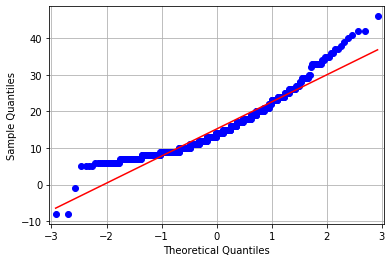

In [15]:
# 2) Test for normality using qqplot.
from statsmodels.graphics.gofplots import qqplot

qqplot(pd.Series(eachPatietsTime),line='s')
plt.grid()

In [16]:
# The qqplot shows that in the lower and upper portions the points doesn't allign to the 45degree line.

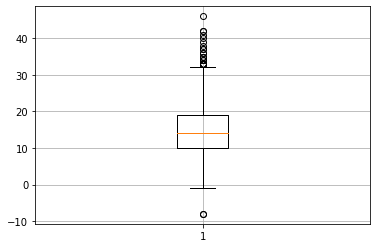

In [17]:
# 3) Medians and outliers using boxplot.

plt.boxplot(eachPatietsTime)
plt.grid()

In [18]:
# The boxplot shows us that there exists outliers at the upper end region of the data.